# imports and constants

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [103]:
G = 4 * np.pi**2 #gravitational constant
t = 13 #total time
dt = 0.00273790926 #time step
a_mercury = 0.39
a_earth = 1
a_mars = 1.524
a_jupiter = 5.2038
m_sun = 1 #mass of the sun in solar masses (or in kg if you want to be wrong)
m_earth = 3.00274e6
m_mars = 3.213e-6
m_moon = 3.69432e-8
N = int(t/dt)

# initial conditions

In [106]:
sun_pos = np.array([0.0, 0.0])
mercury_pos = np.array([0.307, 0.0])
earth_pos = np.array([0.9832899, 0.0])
mars_pos = np.array([1.38, 0.0])
jupiter_pos = np.array([4.95, 0.0])
neptune_pos = np.array([30.07, 0.0])

# acceleration function

In [109]:
def accel(r):
    r_mag = np.linalg.norm(r)
    return -(G * r )/ r_mag**3

# new acceleration function

# initial velocities

In [114]:
def vel(r):
    r0 = np.linalg.norm(r)
    return np.sqrt(G * m_sun * ( (2 / r0) - (1 / a_earth) ))

# MER CURRY

In [117]:
a0_mer = accel(mercury_pos)
r_mag_mer = np.linalg.norm(mercury_pos)
v_mag_mer = np.sqrt(G * m_sun * ( (2 / r_mag_mer) - (1 / a_mercury) ))
print(v_mag_mer)

12.488461734575566


In [119]:
pos_mer = []
a_old_mer = accel(mercury_pos)
r_mer = np.array([-mercury_pos[-1],mercury_pos[0]]) / r_mag_mer

mercury_v = v_mag_mer * r_mer

for i in range(N):
    mercury_v += a_old_mer * (dt/2)
    mercury_pos += mercury_v * dt
    a_new_mer = accel(mercury_pos.copy())
    mercury_v += a_new_mer * (dt/2)
    a_old_mer = a_new_mer
    pos_mer.append(mercury_pos.copy())

# EARF

In [122]:
a0_e = accel(earth_pos)
r_mag_e = np.linalg.norm(earth_pos)
v_mag_e = np.sqrt(G * m_sun * ( (2 / r_mag_e) - (1 / a_earth) ))
print(v_mag_e)

6.389070026097736


In [124]:
pos_e = []
a_old_e = accel(earth_pos)
r_e = np.array([-earth_pos[-1],earth_pos[0]]) / r_mag_e

earth_v = v_mag_e * r_e

for i in range(N):
    earth_v += a_old_e * (dt/2)
    earth_pos += earth_v * dt
    a_new_e = accel(earth_pos.copy())
    earth_v += a_new_e * (dt/2)
    a_old_e = a_new_e
    pos_e.append(earth_pos.copy())

# MARZ

In [127]:
a0_m = accel(mars_pos)
r_mag_m = np.linalg.norm(mars_pos)
v_mag_m = np.sqrt(G * m_sun * ( (2 / r_mag_m) - (1 / a_mars) ))
print(v_mag_m)

5.59558973510896


In [129]:
pos_m = []
a_old_m = accel(mars_pos)
r_m = np.array([-mars_pos[-1],mars_pos[0]]) / r_mag_m

mars_v = v_mag_m * r_m

for i in range(N):
    mars_v += a_old_m * (dt/2)
    mars_pos += mars_v * dt
    a_new_m = accel(mars_pos.copy())
    mars_v += a_new_m * (dt/2)
    a_old_m = a_new_m
    pos_m.append(mars_pos.copy())

# JUPYTER

In [132]:
a0_j = accel(jupiter_pos)
r_mag_j = np.linalg.norm(jupiter_pos)
v_mag_j = np.sqrt(G * m_sun * ( (2 / r_mag_j) - (1 / a_jupiter) ))
print(v_mag_j)

2.892130074082442


In [134]:
pos_j = []
a_old_j = accel(jupiter_pos)
r_j = np.array([-jupiter_pos[-1],jupiter_pos[0]]) / r_mag_j

jupiter_v = v_mag_j * r_j

for i in range(N):
    jupiter_v += a_old_j * (dt/2)
    jupiter_pos += jupiter_v * dt
    a_new_j = accel(jupiter_pos.copy())
    jupiter_v += a_new_j * (dt/2)
    a_old_j = a_new_j
    pos_j.append(jupiter_pos.copy())

# NEPTUNE?! (not yet)

In [137]:
a0_n = accel(neptune_pos)
r_mag_n = np.linalg.norm(neptune_pos)
v_mag_n = np.sqrt(np.linalg.norm(a0_n) * r_mag_n)
print(v_mag_n)

1.1458114407747713


In [139]:
'''
pos_n = []
a_old_n = accel(neptune_pos)
r_n = np.array([-neptune_pos[-1],neptune_pos[0]]) / r_mag_n

neptune_v = v_mag_n * r_n

for i in range(N):
    neptune_v += a_old_n * (dt/2)
    neptune_pos += neptune_v * dt
    a_new_n = accel(neptune_pos.copy())
    neptune_v += a_new_n * (dt/2)
    a_old_n = a_new_n
    #pos_n.append(neptune_pos.copy())
'''

'\npos_n = []\na_old_n = accel(neptune_pos)\nr_n = np.array([-neptune_pos[-1],neptune_pos[0]]) / r_mag_n\n\nneptune_v = v_mag_n * r_n\n\nfor i in range(N):\n    neptune_v += a_old_n * (dt/2)\n    neptune_pos += neptune_v * dt\n    a_new_n = accel(neptune_pos.copy())\n    neptune_v += a_new_n * (dt/2)\n    a_old_n = a_new_n\n    #pos_n.append(neptune_pos.copy())\n'

# plot

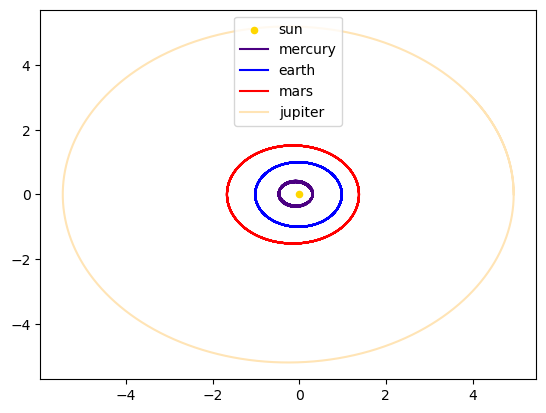

In [144]:
x_mer,y_mer = zip(*pos_mer)
x_e,y_e = zip(*pos_e)
x_m,y_m = zip(*pos_m)
x_j,y_j = zip(*pos_j)
#x_n,y_n = zip(*pos_n)

fig, ax = plt.subplots()
ax.scatter(0,0,s=20,color='gold',label='sun')
ax.plot(x_mer,y_mer,color='indigo',label='mercury')
ax.plot(x_e,y_e,color='blue',label='earth')
ax.plot(x_m,y_m,color='red',label='mars')
ax.plot(x_j,y_j,color='moccasin',label='jupiter')
#ax.plot(x_n,y_n,color='grey')
plt.legend()
plt.savefig("planet.jpg")
plt.show()